In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 31.9 MB/s 
     |████████████████████████████████| 7.6 MB 50.1 MB/s 
     |████████████████████████████████| 182 kB 77.3 MB/s 


In [ ]:
#!pip install "tensorflow==2.6.0"
!pip install transformers "datasets>=1.17.0" tensorboard rouge_score nltk --upgrade
# install gdown for downloading the dataset
!pip install gdown


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 451 kB 28.5 MB/s 
     |████████████████████████████████| 6.0 MB 61.4 MB/s 
     |████████████████████████████████| 212 kB 58.0 MB/s 
     |████████████████████████████████| 132 kB 57.0 MB/s 
     |████████████████████████████████| 127 kB 58.7 MB/s 
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24955 sha256=61fe5390fd348f7e3601818c368f842c3ffc1222f22c93e943c867f634290b9a
  Stored in directory: /root/.cache/pip/wheels/24/55/6f/ebfc4cb176d1c9665da4e306e1705496206d08215c1acd9dde
Successfully built rouge-score
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled 

In [ ]:
!python -m spacy download en_core_web_md 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42.8 MB 1.3 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
# For Weights and Biases
!pip install -qq wandb

     |████████████████████████████████| 1.9 MB 14.6 MB/s 
     |████████████████████████████████| 168 kB 59.6 MB/s 
     |████████████████████████████████| 182 kB 69.4 MB/s 
     |████████████████████████████████| 62 kB 639 kB/s 
     |████████████████████████████████| 168 kB 59.2 MB/s 
     |████████████████████████████████| 166 kB 58.2 MB/s 
     |████████████████████████████████| 166 kB 69.7 MB/s 
     |████████████████████████████████| 162 kB 62.4 MB/s 
     |████████████████████████████████| 162 kB 56.8 MB/s 
     |████████████████████████████████| 158 kB 65.2 MB/s 
     |████████████████████████████████| 157 kB 73.4 MB/s 
     |████████████████████████████████| 157 kB 54.9 MB/s 
     |████████████████████████████████| 157 kB 70.1 MB/s 
     |████████████████████████████████| 157 kB 64.4 MB/s 
     |████████████████████████████████| 157 kB 40.0 MB/s 
     |████████████████████████████████| 157 kB 63.9 MB/s 
     |████████████████████████████████| 157 kB 63.5 MB/s 
     |██████████

In [ ]:
import wandb
print("W&B: ", wandb.__version__)
from wandb.keras import WandbCallback

W&B:  0.13.6


In [ ]:
import wandb
from wandb.keras import WandbCallback
# wandb.init(project="hyperparam-test", entity="ariq913")
wandb.init(project="flant-t5-2", entity="ariq913")

accuracy,▁▃▃▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇█████████████
epoch,▁▁▁▂▂▂▃▃▃▃▃▄▄▄▅▅▅▅▅▆▆▆▇▇▇▇▇██▁▁▁▂▂▂▃▃▃▃
loss,█▆▅▅▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▄▃▆▅▇▇▆▇▇▇▆█▆▆█▆▆▇▇▆▇▇▇▇▇▆▆▆▇▆▆▆█▆▇▆▆▆
val_loss,▂▁▁▁▁▁▁▁▁▁▂▂▂▂▃▂▃▃▄▄▄▄▅▅▅▅▅▆▆▇▆▇▇▆▇▇▇▇█
accuracy,0.7368
best_epoch,3
best_val_loss,0.42914
epoch,9
loss,0.05599
val_accuracy,0.62474


In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 23.5 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.11.0
    Uninstalling tensorboard-2.11.0:
      Successfully uninstalled tensorboard-2.11.0


![](img/prepare_dataset_bert.png)

In [ ]:
# max_seq_length = 18

In [ ]:
model_id="google/flan-t5-small"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/cleaned_twitter_sentiment_data.csv")

In [ ]:

# import spacy
  
# nlp = spacy.load('en_core_web_md')


In [ ]:
df.head()

,Unnamed: 0,sentiment,message,tweetid
0,0,Anti,climate change is an interesting hustle as it ...,792927353886371840
1,1,Pro,rt watch right here as travels the world to ta...,793124211518832641
2,2,Pro,fabulous leonardo s film on change is brillian...,793124402388832256
3,3,Pro,rt just watched this amazing documentary by le...,793124635873275904
4,4,News,rt pranita biswasi a lutheran from odisha give...,793125156185137153


In [ ]:
df["message"]=df["message"].apply(lambda x: 'multilabel classification: '  + str(x)  )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43943 entries, 0 to 43942
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  43943 non-null  int64 
 1   sentiment   43943 non-null  object
 2   message     43943 non-null  object
 3   tweetid     43943 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.3+ MB


In [ ]:
df["length"]=df["message"].apply(lambda x: len(str(x).split(" ")))

In [ ]:
min(df["length"])

3

In [ ]:
df = df.drop(df[df.length<6].index)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43715 entries, 0 to 43942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  43715 non-null  int64 
 1   sentiment   43715 non-null  object
 2   message     43715 non-null  object
 3   tweetid     43715 non-null  int64 
 4   length      43715 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.0+ MB


In [ ]:
s=set(df["sentiment"])
print(s)

{'News', 'Pro', 'Neutral', 'Anti'}


In [ ]:
df.head()

,Unnamed: 0,sentiment,message,tweetid,length
0,0,Anti,multilabel classification: climate change is a...,792927353886371840,24
1,1,Pro,multilabel classification: rt watch right here...,793124211518832641,15
2,2,Pro,multilabel classification: fabulous leonardo s...,793124402388832256,14
3,3,Pro,multilabel classification: rt just watched thi...,793124635873275904,18
4,4,News,multilabel classification: rt pranita biswasi ...,793125156185137153,22


# Convert Raw Text to BERT Features using Hugging Face and TensorFlow

In [ ]:
df_grouped_by = df.groupby(["sentiment"])
df_balanced = df_grouped_by.apply(
            lambda x: x.sample(df_grouped_by.size().min()).reset_index(drop=True)
        )
df_balanced = df_balanced.reset_index(drop=True)
print("Shape of balanced dataframe {}".format(df_balanced.shape))

print(df_balanced["sentiment"].head(2))
print(df_balanced["message"].head(2))

df = df_balanced
df = df.sample(frac=1).reset_index(drop=True)
df = df.sample(frac=1).reset_index(drop=True)

Shape of balanced dataframe (15904, 5)
0    Anti
1    Anti
Name: sentiment, dtype: object
0    multilabel classification: rt can anyone say m...
1    multilabel classification: rt funny the other ...
Name: message, dtype: object


In [ ]:
# lab_text={-1:"bad",0:"neutral",1:"good",2:"better"}


In [ ]:
df["label_txt"]=df["sentiment"]

In [ ]:
df.head()

,Unnamed: 0,sentiment,message,tweetid,length,label_txt
0,32743,Anti,multilabel classification: rt climate change c...,953330394367234048,19,Anti
1,28759,News,multilabel classification: nanotechnology migh...,931530273245630464,15,News
2,9955,Neutral,multilabel classification: you cannot come out...,811797651272400896,24,Neutral
3,35830,Neutral,multilabel classification: rt don cherry is ar...,959052408574828544,20,Neutral
4,373,Neutral,multilabel classification: meet the unopposed ...,793367158612865024,22,Neutral


In [ ]:
# df["label_txt"]=df["sentiment"].apply(lambda x : lab_text[x])

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_id)

In [ ]:
from sklearn.model_selection import train_test_split
train_split_percentage=0.9
test_split_percentage=0.05

In [ ]:
holdout_percentage = 1.00 - train_split_percentage
print("holdout percentage {}".format(holdout_percentage))

df_train, df_holdout = train_test_split(
        df, test_size=holdout_percentage, stratify=df["sentiment"]
    )

test_holdout_percentage = test_split_percentage / holdout_percentage

print("test holdout percentage {}".format(test_holdout_percentage))

df_validation, df_test = train_test_split(
        df_holdout, test_size=test_holdout_percentage, stratify=df_holdout["sentiment"]
    )

df_train = df_train.reset_index(drop=True)
df_validation = df_validation.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_test=df_test[:50]

holdout percentage 0.09999999999999998
test holdout percentage 0.5000000000000001


In [ ]:
# train_json = df_train.to_dict('series')
# # train_json= json.loads(train_json)
from datasets import Dataset, DatasetDict
tds = Dataset.from_pandas(df_train)
vds = Dataset.from_pandas(df_validation)

In [ ]:
teds=Dataset.from_pandas(df_test)

In [ ]:
# tds.save_to_disk("/content/drive/MyDrive/T5/train")
# vds.save_to_disk("/content/drive/MyDrive/T5/validation")
# teds=Dataset.from_pandas("/content/drive/MyDrive/T5/test")

In [ ]:
import json
max_input_length = 22
max_target_length = 4


def preprocess_function(example):
    model_inputs = tokenizer(
        example["message"], max_length=max_input_length, truncation=True
    )
    # Set up the tokenizer for targets
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(
            example["label_txt"], max_length=max_target_length, truncation=True
        )

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# train_json = df_train.to_dict('series')
# # train_json= json.loads(train_json)
# tr_dat=train_json.map(preprocess_function, batched=True)
# tr_dat= df_train.apply(lambda x:preprocess_function(x["message"],x["label_txt"]),axis=1)
# val_dat=df_validation.apply(lambda x:preprocess_function(x["message"],x["label_txt"]),axis=1)
# test_dat = df_test.apply(lambda x:preprocess_function(x["message"],x["label_txt"]),axis=1)
tr_dat=tds.map(preprocess_function, batched=True)
val_dat=vds.map(preprocess_function, batched=True)
te_dat=teds.map(preprocess_function, batched=True)

  0%|          | 0/15 [00:00<?, ?ba/s]

/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:3578: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
tr_dat

Dataset({
    features: ['Unnamed: 0', 'sentiment', 'message', 'tweetid', 'length', 'label_txt', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 14313
})

In [ ]:

# from huggingface_hub import HfFolder
import tensorflow as tf


num_train_epochs = 70
train_batch_size = 16
eval_batch_size = 16
learning_rate = 5.6e-5
weight_decay_rate=0.01
num_warmup_steps=0
epsilon = 1e-08

In [ ]:
wandb.config = {
    "epochs":num_train_epochs,
  "learning_rate": learning_rate,
  "max_seq_length": 22,
  "freeze_T5_layer":True,
  "number_of_freeze":2,
  "weight_decay_rate":weight_decay_rate,

  
}

In [ ]:

from transformers import TFAutoModelForSeq2SeqLM
# load pre-trained model
model = TFAutoModelForSeq2SeqLM.from_pretrained(model_id)

All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at google/flan-t5-small.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


In [ ]:

for layer in model.layers[:2]:
    layer.trainable = False

In [ ]:
model.summary()

Model: "tft5_for_conditional_generation_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 shared (Embedding)          multiple                  16449536  
                                                                 
 encoder (TFT5MainLayer)     multiple                  35332800  
                                                                 
 decoder (TFT5MainLayer)     multiple                  41628352  
                                                                 
 lm_head (Dense)             multiple                  16449536  
                                                                 
Total params: 76,961,152
Trainable params: 41,628,352
Non-trainable params: 35,332,800
_________________________________________________________________


In [ ]:
from transformers import DataCollatorForSeq2Seq

# Data collator that will dynamically pad the inputs received, as well as the labels.
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model, return_tensors="tf")

# converting our train dataset to tf.data.Dataset
tf_train_dataset = tr_dat.to_tf_dataset(
   columns=["input_ids", "attention_mask", "labels"],
   shuffle=True,
   batch_size=train_batch_size,
   collate_fn=data_collator)

# converting our test dataset to tf.data.Dataset
tf_eval_dataset = val_dat.to_tf_dataset(
   columns=["input_ids", "attention_mask", "labels"],
   shuffle=True,
   batch_size=eval_batch_size,
   collate_fn=data_collator)


You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [ ]:
tf_te_dataset=te_dat.to_tf_dataset(
   columns=["input_ids", "attention_mask", "labels"],
   shuffle=True,
   batch_size=eval_batch_size,
   collate_fn=data_collator)


In [ ]:
from transformers import create_optimizer
import tensorflow as tf


# create optimizer wight weigh decay
num_train_steps = len(tf_train_dataset) * num_train_epochs
# optimizer, lr_schedule = create_optimizer(
#     init_lr=learning_rate,
#     num_train_steps=num_train_steps,
#     weight_decay_rate=weight_decay_rate,
#     num_warmup_steps=num_warmup_steps,
# )
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, epsilon=epsilon)
# for layer in model.layers[:2]:
#     layer.trainable = not freeze_bert_layer
metric = tf.keras.metrics.SparseCategoricalAccuracy("accuracy")
# compile model
model.compile(optimizer=optimizer,metrics=[metric])

No loss specified in compile() - the model's internal loss computation will be used as the loss. Don't panic - this is a common way to train TensorFlow models in Transformers! To disable this behaviour please pass a loss argument, or explicitly pass `loss=None` if you do not want your model to compute a loss.


In [ ]:

# for layer in model.layers[:2]:
#     layer.trainable = True

In [ ]:
model.summary()

Model: "tft5_for_conditional_generation_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 shared (Embedding)          multiple                  16449536  
                                                                 
 encoder (TFT5MainLayer)     multiple                  35332800  
                                                                 
 decoder (TFT5MainLayer)     multiple                  41628352  
                                                                 
 lm_head (Dense)             multiple                  16449536  
                                                                 
Total params: 76,961,152
Trainable params: 76,961,152
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=25)
train_results = model.fit(
    tf_train_dataset,
    validation_data=tf_eval_dataset,
    epochs=num_train_epochs,
    verbose=2,
    callbacks=[WandbCallback(),es]
    # callbacks=[es]
)


Epoch 1/70


wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20221207_235629-34idvxap/files/model-best)... Done. 4.0s


895/895 - 168s - loss: 0.9709 - accuracy: 0.5172 - val_loss: 0.5317 - val_accuracy: 0.5690 - 168s/epoch - 187ms/step
Epoch 2/70


wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20221207_235629-34idvxap/files/model-best)... Done. 3.8s


895/895 - 123s - loss: 0.5688 - accuracy: 0.5632 - val_loss: 0.4985 - val_accuracy: 0.5904 - 123s/epoch - 137ms/step
Epoch 3/70


wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20221207_235629-34idvxap/files/model-best)... Done. 3.9s


895/895 - 126s - loss: 0.5253 - accuracy: 0.5793 - val_loss: 0.4710 - val_accuracy: 0.6043 - 126s/epoch - 141ms/step
Epoch 4/70


wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20221207_235629-34idvxap/files/model-best)... Done. 4.1s


895/895 - 125s - loss: 0.5043 - accuracy: 0.5857 - val_loss: 0.4638 - val_accuracy: 0.6057 - 125s/epoch - 140ms/step
Epoch 5/70


wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20221207_235629-34idvxap/files/model-best)... Done. 3.8s


895/895 - 126s - loss: 0.4895 - accuracy: 0.5934 - val_loss: 0.4597 - val_accuracy: 0.6004 - 126s/epoch - 140ms/step
Epoch 6/70


wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20221207_235629-34idvxap/files/model-best)... Done. 4.1s


895/895 - 122s - loss: 0.4767 - accuracy: 0.5955 - val_loss: 0.4587 - val_accuracy: 0.6080 - 122s/epoch - 137ms/step
Epoch 7/70


wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20221207_235629-34idvxap/files/model-best)... Done. 3.8s


895/895 - 121s - loss: 0.4693 - accuracy: 0.6019 - val_loss: 0.4524 - val_accuracy: 0.6013 - 121s/epoch - 135ms/step
Epoch 8/70
895/895 - 67s - loss: 0.4571 - accuracy: 0.6053 - val_loss: 0.4608 - val_accuracy: 0.6025 - 67s/epoch - 75ms/step
Epoch 9/70


wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20221207_235629-34idvxap/files/model-best)... Done. 3.8s


895/895 - 124s - loss: 0.4500 - accuracy: 0.6073 - val_loss: 0.4503 - val_accuracy: 0.6112 - 124s/epoch - 139ms/step
Epoch 10/70


wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20221207_235629-34idvxap/files/model-best)... Done. 3.8s


895/895 - 127s - loss: 0.4405 - accuracy: 0.6102 - val_loss: 0.4438 - val_accuracy: 0.6121 - 127s/epoch - 142ms/step
Epoch 11/70
895/895 - 65s - loss: 0.4354 - accuracy: 0.6125 - val_loss: 0.4531 - val_accuracy: 0.6092 - 65s/epoch - 72ms/step
Epoch 12/70
895/895 - 67s - loss: 0.4274 - accuracy: 0.6153 - val_loss: 0.4523 - val_accuracy: 0.6159 - 67s/epoch - 75ms/step
Epoch 13/70


wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20221207_235629-34idvxap/files/model-best)... Done. 3.9s


895/895 - 123s - loss: 0.4211 - accuracy: 0.6219 - val_loss: 0.4373 - val_accuracy: 0.6176 - 123s/epoch - 137ms/step
Epoch 14/70
895/895 - 67s - loss: 0.4182 - accuracy: 0.6201 - val_loss: 0.4373 - val_accuracy: 0.6184 - 67s/epoch - 75ms/step
Epoch 15/70


wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20221207_235629-34idvxap/files/model-best)... Done. 3.8s


895/895 - 125s - loss: 0.4091 - accuracy: 0.6223 - val_loss: 0.4351 - val_accuracy: 0.6176 - 125s/epoch - 139ms/step
Epoch 16/70
895/895 - 64s - loss: 0.4070 - accuracy: 0.6216 - val_loss: 0.4382 - val_accuracy: 0.6143 - 64s/epoch - 72ms/step
Epoch 17/70


wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20221207_235629-34idvxap/files/model-best)... Done. 4.0s


895/895 - 128s - loss: 0.4008 - accuracy: 0.6263 - val_loss: 0.4269 - val_accuracy: 0.6176 - 128s/epoch - 143ms/step
Epoch 18/70
895/895 - 65s - loss: 0.3943 - accuracy: 0.6290 - val_loss: 0.4352 - val_accuracy: 0.6155 - 65s/epoch - 72ms/step
Epoch 19/70
895/895 - 63s - loss: 0.3906 - accuracy: 0.6275 - val_loss: 0.4360 - val_accuracy: 0.6176 - 63s/epoch - 70ms/step
Epoch 20/70
895/895 - 65s - loss: 0.3850 - accuracy: 0.6321 - val_loss: 0.4328 - val_accuracy: 0.6189 - 65s/epoch - 72ms/step
Epoch 21/70
895/895 - 61s - loss: 0.3849 - accuracy: 0.6308 - val_loss: 0.4286 - val_accuracy: 0.6235 - 61s/epoch - 68ms/step
Epoch 22/70
895/895 - 67s - loss: 0.3776 - accuracy: 0.6341 - val_loss: 0.4367 - val_accuracy: 0.6193 - 67s/epoch - 75ms/step
Epoch 23/70
895/895 - 61s - loss: 0.3765 - accuracy: 0.6364 - val_loss: 0.4314 - val_accuracy: 0.6176 - 61s/epoch - 69ms/step
Epoch 24/70
895/895 - 61s - loss: 0.3695 - accuracy: 0.6374 - val_loss: 0.4354 - val_accuracy: 0.6205 - 61s/epoch - 69ms/step
E

In [ ]:
model.save("/content/drive/MyDrive/T5/model")

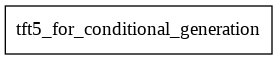

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="/content/drive/MyDrive/T5/flant5_model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)

In [ ]:
from datasets import load_metric
from tqdm import tqdm
import numpy as np
import nltk
nltk.download("punkt")
from nltk.tokenize import sent_tokenize

metric = load_metric("rouge")


def evaluate(model, dataset):
    
    all_predictions = []
    all_labels = []
    y_actual=[]
    y_test=[]
    for batch in tqdm(dataset):
        predictions = model.generate(batch["input_ids"])
        decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
        labels = batch["labels"].numpy()
        labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
        decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
        decoded_preds = ["\n".join(sent_tokenize(pred.strip())) for pred in decoded_preds]
        decoded_labels = ["\n".join(sent_tokenize(label.strip())) for label in decoded_labels]
        y_actual+=decoded_labels
        y_test+=decoded_preds
        # print(sent_tokenize(pred.strip()))
        # print(sent_tokenize(label.strip()))
        # print(decoded_preds,decoded_labels,len(decoded_preds),len(decoded_labels))
        # all_predictions.extend(decoded_preds)
        # all_labels.extend(decoded_labels)
        # result = metric.compute(
        #     predictions=decoded_preds, references=decoded_labels, use_stemmer=True
        # )

        
    # result = {key: value.mid.fmeasure * 100 for key, value in result.items()}
    # k: round(v, 4) for k, v in result.items()} ,
    return  y_test , y_actual


y_test, y_actual = evaluate(model, tf_te_dataset)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
  0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/transformers/generation/tf_utils.py:1800: UserWarning: Neither `max_length` nor `max_new_tokens` have been set, `max_length` will default to 20 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
100%|██████████| 4/4 [00:02<00:00,  1.56it/s]


In [ ]:
y_test

['News',
 'Anti',
 'Pro',
 'News',
 'Pro',
 'Pro',
 'Neutral',
 'Anti',
 'Anti',
 'Pro',
 'Anti',
 'Neutral',
 'Anti',
 'Neutral',
 'Neutral',
 'Anti',
 'News',
 'Neutral',
 'News',
 'Anti',
 'Anti',
 'News',
 'Neutral',
 'Neutral',
 'News',
 'News',
 'Anti',
 'Anti',
 'News',
 'Neutral',
 'News',
 'Pro',
 'News',
 'Pro',
 'News',
 'Pro',
 'News',
 'Neutral',
 'Neutral',
 'Anti',
 'News',
 'Anti',
 'News',
 'News',
 'News',
 'Anti',
 'Anti',
 'Neutral',
 'Neutral',
 'Neutral']

In [ ]:
y_actual

['News',
 'Anti',
 'Neutral',
 'News',
 'Pro',
 'Anti',
 'Neutral',
 'Anti',
 'Anti',
 'Pro',
 'Anti',
 'Pro',
 'Pro',
 'Neutral',
 'Neutral',
 'News',
 'Neutral',
 'Pro',
 'Anti',
 'News',
 'Anti',
 'News',
 'Pro',
 'Neutral',
 'News',
 'News',
 'Anti',
 'Neutral',
 'News',
 'Neutral',
 'Pro',
 'Pro',
 'News',
 'Pro',
 'Neutral',
 'Pro',
 'Anti',
 'Neutral',
 'News',
 'Anti',
 'Neutral',
 'Pro',
 'News',
 'News',
 'News',
 'Anti',
 'Anti',
 'Neutral',
 'Neutral',
 'Neutral']

In [ ]:
len(y_test),len(y_actual)

(50, 50)

In [ ]:
chg={'Anti':-1, 'Neutral':0, 'News':1, 'Pro':2}
for i, v in enumerate(y_actual):
  y_actual[i]=chg[v]
for i,v in enumerate(y_test):
  y_test[i]=chg[v]

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
classification_report(y_true=y_actual, y_pred=y_test)

'              precision    recall  f1-score   support\n\n          -1       0.62      0.67      0.64        12\n           0       0.71      0.71      0.71        14\n           1       0.58      0.54      0.56        13\n           2       0.64      0.64      0.64        11\n\n    accuracy                           0.64        50\n   macro avg       0.64      0.64      0.64        50\nweighted avg       0.64      0.64      0.64        50\n'

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
classification_report(y_true=y_actual, y_pred=y_test)

'              precision    recall  f1-score   support\n\n          -1       0.69      0.75      0.72        12\n           0       0.62      0.71      0.67        14\n           1       0.67      0.62      0.64        13\n           2       0.89      0.73      0.80        11\n\n    accuracy                           0.70        50\n   macro avg       0.72      0.70      0.71        50\nweighted avg       0.71      0.70      0.70        50\n'

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
classification_report(y_true=y_actual, y_pred=y_test)

'              precision    recall  f1-score   support\n\n          -1       0.64      0.75      0.69        12\n           0       0.69      0.64      0.67        14\n           1       0.62      0.77      0.69        13\n           2       0.71      0.45      0.56        11\n\n    accuracy                           0.66        50\n   macro avg       0.67      0.65      0.65        50\nweighted avg       0.67      0.66      0.65        50\n'

In [ ]:
accuracy = accuracy_score(y_true=y_actual, y_pred=y_test)
print("Test accuracy: ", accuracy)

Test accuracy:  0.64


In [ ]:
accuracy = accuracy_score(y_true=y_actual, y_pred=y_test)
print("Test accuracy: ", accuracy)

Test accuracy:  0.7


In [ ]:
accuracy = accuracy_score(y_true=y_actual, y_pred=y_test)
print("Test accuracy: ", accuracy)

Test accuracy:  0.66


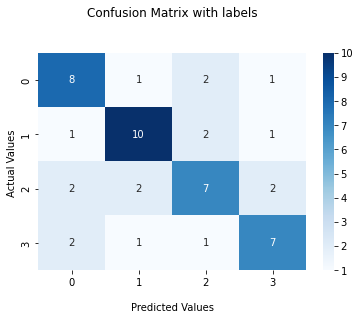

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_actual, y_test)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
# ax.xaxis.set_ticklabels(['False','True'])
# ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

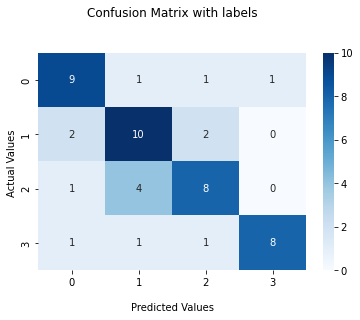

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_actual, y_test)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
# ax.xaxis.set_ticklabels(['False','True'])
# ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

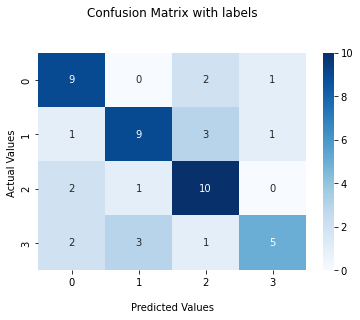

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_actual, y_test)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
# ax.xaxis.set_ticklabels(['False','True'])
# ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()